# ASP Bundle Adjust Plotting
## Examples for BlackSky Easton Glacier test case (n=20)
David Shean  
12/24/22

In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors
import contextily as ctx

In [2]:
from asp_plot_util import *

In [47]:
topdir = '/nobackup/bpurint1/data/utqiagvik/WV/utqiagvik_wv_EE/2022/WV02_20220411_10300100D102A400_10300100D1B7D600'
ba_prefix = 'ba/ba_100ips_dg'
map_crs = 'EPSG:32604'
refdem = 'COP30_lzw-adj_proj.tif' # NOT needed, because geodiff output is: *-initial_residuals_pointmap-diff.csv, but useful for titling map
refdem_abbrv = refdem[0:5]

In [18]:
# Use to compare multi-stage bundle_adjust results
# compares the initial bundle_adjust output with post-pc_align bundle_adjust output
# should actually ALWAYS run this after the first step (if `pc_align` version exists)
two_stage = False

In [13]:
cd $topdir

/nobackupp28/bpurint1/data/utqiagvik/WV/utqiagvik_wv_EE/2022/WV02_20220411_10300100D102A400_10300100D1B7D600


In [14]:
source = ctx.providers.Esri.WorldImagery
#source = ctx.providers.Stamen.Terrain

In [15]:
ctx_kwargs = {'crs':map_crs, 'source':source, 'attribution_size':0, 'alpha':0.5}

## Residuals

In [16]:
def read_residuals(csv_fn):
    resid_cols=['lon', 'lat', 'height_above_datum', 'mean_residual', 'num_observations']
    resid_df = pd.read_csv(csv_fn, skiprows=2, names=resid_cols)
    #Need the astype('str') to handle cases where column has dtype of int (without the # from DEM appended to some rows)
    resid_df['from_DEM'] = resid_df['num_observations'].astype('str').str.contains('# from DEM')
    resid_df['num_observations'] = resid_df['num_observations'].astype('str').str.split('#', expand=True)[0].astype(int)
    resid_gdf = gpd.GeoDataFrame(resid_df, geometry=gpd.points_from_xy(resid_df['lon'], resid_df['lat'], crs='EPSG:4326'))
    return resid_gdf

In [17]:
resid_init_csv = ba_prefix+'-initial_residuals_pointmap.csv'
resid_final_csv = ba_prefix+'-final_residuals_pointmap.csv'

In [19]:
#This compares the initial bundle_adjust output with post-pc_align bundle_adjust output
if two_stage:
    resid_init_csv = ba_prefix+'-final_residuals_pointmap.csv'
    resid_final_csv = ba_prefix+'_pc_align-final_residuals_pointmap.csv'

In [20]:
!cat $resid_final_csv

# lon, lat, height_above_datum, mean_residual, num_observations
# Geodetic Datum --> Name: WGS_1984  Spheroid: WGS 84  Semi-major axis: 6378137  Semi-minor axis: 6356752.3142451793  Meridian: Greenwich at 0  Proj4 Str: +proj=longlat +datum=WGS84 +no_defs
-156.87475521203842, 71.325538302043029, 14.90120503173306, 2.1131498633008352, 2
-156.87409607982562, 71.287111410437021, 3.3205738128117508, 0.065902844847975456, 2
-156.87400976292025, 71.273275995903944, 3.7247819405729659, 0.13993866542684069, 2
-156.87393228291381, 71.273202274903468, 3.7833813965338314, 0.024239124807597059, 2
-156.8736369395433, 71.383951264395378, 32.183059000974978, 2.8890616859711975, 2
-156.87318936449947, 71.320706031221064, 22.535578408267909, 0.13328718621414737, 2
-156.87323933893234, 71.32488829249435, 16.490069195000554, 1.9261069426070512, 2
-156.87271716579733, 71.283765693418772, 5.482695313369403, 0.051190949518058915, 2
-156.87222372535084, 71.26689591466436, 4.2405897562195776, 0.174278198166575

In [21]:
resid_init = read_residuals(resid_init_csv)
resid_final = read_residuals(resid_final_csv)

<Axes: >

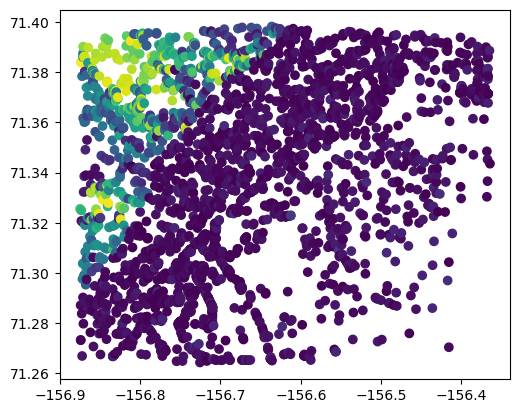

In [29]:
resid_final.plot(c=resid_final["mean_residual"])

In [30]:
#Computer center for map plots later
centroid_gdf = resid_final.to_crs(map_crs).dissolve().centroid

In [31]:
centroid_gdf

0    POINT (582943.231 7916810.611)
dtype: geometry

In [32]:
resid_init.describe()

,lon,lat,height_above_datum,mean_residual,num_observations
count,3058.000000,3058.000000,3058.000000,3058.000000,3058.0
mean,-156.666531,71.337982,112.332821,20.983824,2.0
std,0.137760,0.038381,1513.008038,87.629493,0.0
min,-156.896152,71.261635,-24865.877308,0.010461,2.0
25%,-156.776247,71.304694,3.497940,0.878463,2.0
50%,-156.692521,71.341609,6.437705,1.013261,2.0
75%,-156.564476,71.372437,19.742187,1.454496,2.0
max,-156.343703,71.398394,16236.751963,659.721204,2.0


In [33]:
resid_final.describe()

,lon,lat,height_above_datum,mean_residual,num_observations
count,2789.000000,2789.000000,2789.000000,2789.000000,2789.0
mean,-156.676845,71.339057,12.353547,0.431020,2.0
std,0.128649,0.037958,13.005048,0.705675,0.0
min,-156.874755,71.264309,-23.725733,0.000053,2.0
25%,-156.778187,71.306729,3.488109,0.047199,2.0
50%,-156.703288,71.343651,5.889786,0.110362,2.0
75%,-156.587666,71.372545,16.118182,0.315526,2.0
max,-156.364478,71.398208,75.543176,2.993503,2.0


In [34]:
def resid_plot(init, final, col='mean_residual', clip_final=True, lognorm=False, clim=None, cmap='inferno'):
    f, axa = plt.subplots(1,2, figsize=(10,3), sharex=True, sharey=True)
    if clim is None:
        clim_init = get_clim(init[col], perc=(0,98))
        clim_final = get_clim(final[col], perc=(0,98))
        vmin = min(clim_init[0], clim_final[0])
        vmax = max(clim_init[1], clim_final[1])
    else:
        vmin, vmax = clim
    print(vmin, vmax)
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    if lognorm:
        norm = matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax)
    plot_kw = {'cmap':cmap, 'norm':norm, 's':1, 'legend':True, 'legend_kwds':{'label': col}}
    final.sort_values(by=col).to_crs(map_crs).plot(ax=axa[1], column=col, **plot_kw)
    ctx.add_basemap(ax=axa[1], **ctx_kwargs)
    if clip_final:
        axa[0].autoscale(False)
    init.sort_values(by=col).to_crs(map_crs).plot(ax=axa[0], column=col, **plot_kw)
    ctx.add_basemap(ax=axa[0], **ctx_kwargs)
    axa[0].set_title(f'Initial Residuals (n={init.shape[0]})')
    axa[1].set_title(f'Final Residuals (n={final.shape[0]})')
    plt.tight_layout()

5.344644365929222e-05 387.1042532843045


/swbuild/bpurint1/miniconda3/envs/ben_py3/lib/python3.11/site-packages/contextily/tile.py:222: UserWarning: Persisting input arguments took 0.63s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably some large input arguments for a wrapped function.
  image = _fetch_tile(tile_url, wait, max_retries)


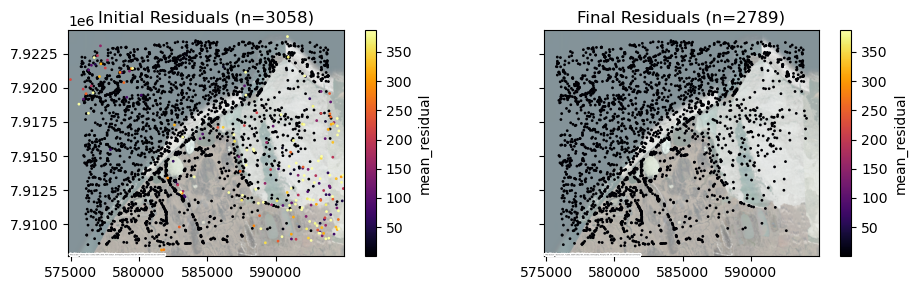

In [35]:
resid_plot(resid_init, resid_final, col='mean_residual', lognorm=False)

5.344644365929222e-05 387.1042532843045


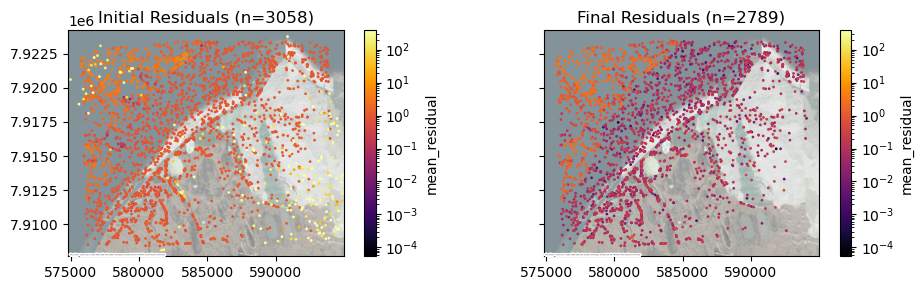

In [36]:
resid_plot(resid_init, resid_final, col='mean_residual', lognorm=True)

2.0 2.0


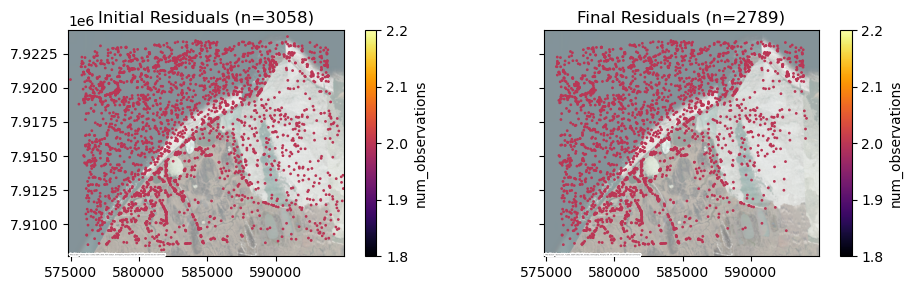

In [37]:
resid_plot(resid_init, resid_final, col='num_observations')

## Isolate points used during `--heights-from-DEM`
Most relelvant when refDEM was masked over changing surfaces

In [38]:
if 'from_DEM' in resid_init.columns:
    idx1 = resid_init['from_DEM']
    idx2 = resid_final['from_DEM']

In [42]:
if idx1.any() and idx2.any():
    resid_plot(resid_init[idx1], resid_final[idx2], col='mean_residual', lognorm=True)

5.344644365929222e-05 387.1042532843045


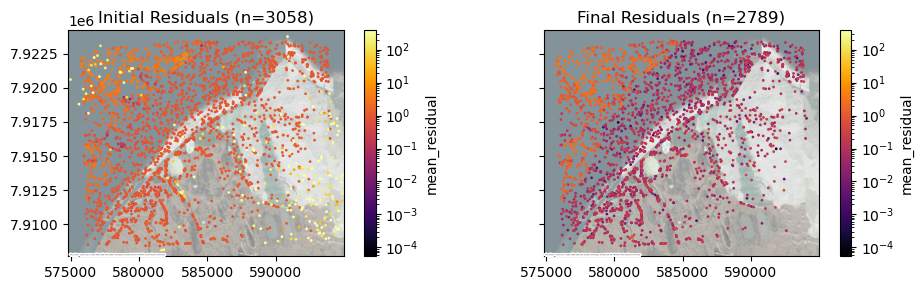

In [43]:
if ~idx1.any() and ~idx2.any():
    resid_plot(resid_init[~idx1], resid_final[~idx2], col='mean_residual', lognorm=True)

## geodiff output

In [44]:
def read_geodiff(csv_fn):
    resid_cols=['lon', 'lat', 'diff']
    resid_df = pd.read_csv(csv_fn, comment='#', names=resid_cols)
    resid_gdf = gpd.GeoDataFrame(resid_df, geometry=gpd.points_from_xy(resid_df['lon'], resid_df['lat'], crs='EPSG:4326'))
    return resid_gdf

In [45]:
#geodiff_csv = ba_prefix+f'-final_residuals_pointmap__{os.path.splitext(refdem)[0]}-diff.csv'
geodiff_init_csv = ba_prefix+'-initial_residuals_pointmap-diff.csv'
geodiff_final_csv = ba_prefix+'-final_residuals_pointmap-diff.csv'

In [46]:
#This compares the initial bundle_adjust output with post-pc_align bundle_adjust output
if two_stage:
    geodiff_init_csv = ba_prefix+'-final_residuals_pointmap-diff.csv'
    resid_final_csv = ba_prefix+'_pc_align-final_residuals_pointmap-diff.csv'

               lon          lat          diff
count  3058.000000  3058.000000   3058.000000
mean   -156.666531    71.337982    111.727817
std       0.137760     0.038381   1513.092275
min    -156.896152    71.261635 -24864.944038
25%    -156.776247    71.304694      4.088454
50%    -156.692521    71.341609      4.949971
75%    -156.564476    71.372437     20.118677
max    -156.343703    71.398394  16237.677053
               lon          lat         diff
count  2789.000000  2789.000000  2789.000000
mean   -156.676845    71.339057    11.642054
std       0.128649     0.037958    13.450898
min    -156.874755    71.264309   -22.762241
25%    -156.778187    71.306729     4.080757
50%    -156.703288    71.343651     4.864489
75%    -156.587666    71.372545    11.650564
max    -156.364478    71.398208    76.497133
-15 15


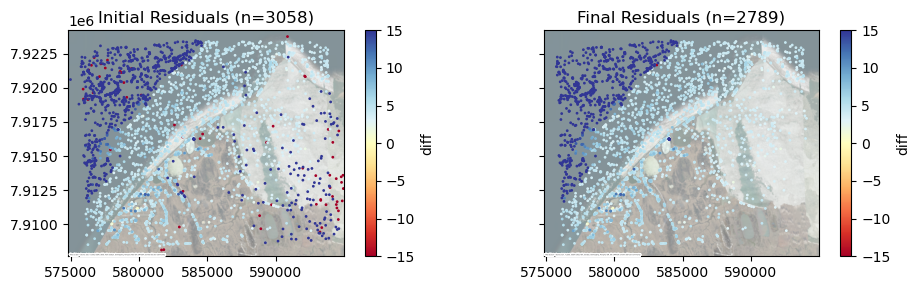

In [56]:
if os.path.exists(geodiff_init_csv) and os.path.exists(geodiff_final_csv):
    geodiff_init = read_geodiff(geodiff_init_csv)
    geodiff_final = read_geodiff(geodiff_final_csv)
    print(geodiff_init.describe())
    print(geodiff_final.describe())
    resid_plot(geodiff_init, geodiff_final, col='diff', clim=(-15, 15), cmap='RdYlBu')

## Mapproject Residuals

In [52]:
def read_mapproj_match_offset(csv_fn):
    resid_cols=['lon', 'lat', 'height_above_datum', 'mapproj_ip_dist_meters']
    resid_df = pd.read_csv(csv_fn, skiprows=2, names=resid_cols)
    resid_gdf = gpd.GeoDataFrame(resid_df, geometry=gpd.points_from_xy(resid_df['lon'], resid_df['lat'], crs='EPSG:4326'))
    return resid_gdf

In [53]:
mapproj_match_offset_txt = ba_prefix+'-mapproj_match_offsets.txt'

In [55]:
if os.path.exists(mapproj_match_offset_txt):
    mapproj_match_offset = read_mapproj_match_offset(mapproj_match_offset_txt)
    print(mapproj_match_offset.describe())
    col='mapproj_ip_dist_meters'


               lon          lat  height_above_datum  mapproj_ip_dist_meters
count  2604.000000  2604.000000         2604.000000             2604.000000
mean   -156.668500    71.336611            0.825642                7.524536
std       0.128424     0.037791            3.239475                8.993087
min    -156.874050    71.264305           -1.400042                0.315470
25%    -156.769000    71.303905           -0.950729                3.015415
50%    -156.690425    71.339924           -0.905584                3.542780
75%    -156.575928    71.369968            1.447946                4.854652
max    -156.364440    71.398155           14.573268               56.582611


<Axes: >

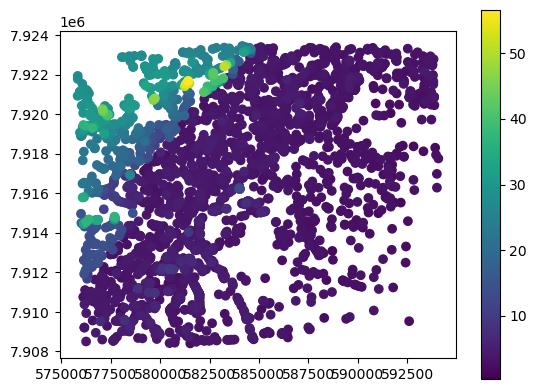

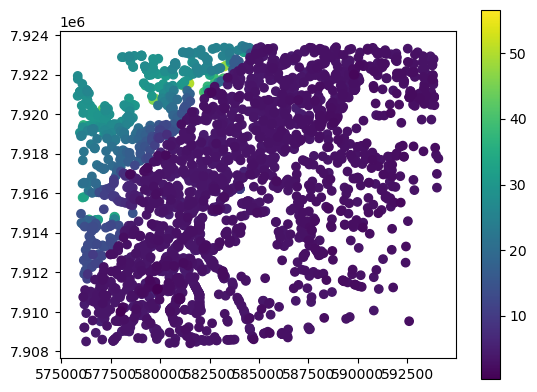

In [57]:
mapproj_match_offset.sort_values(by=col, ascending=True).to_crs(map_crs).plot(column=col, legend=True)
mapproj_match_offset.sort_values(by=col, ascending=False).to_crs(map_crs).plot(column=col, legend=True)

<Axes: >

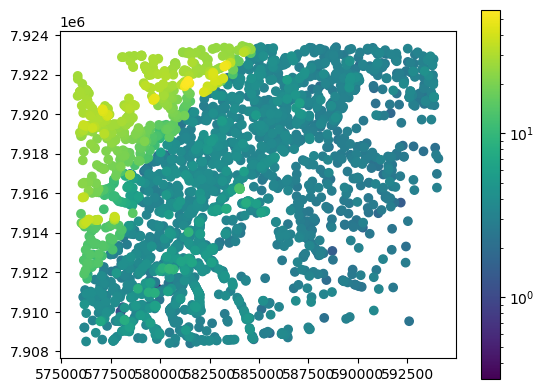

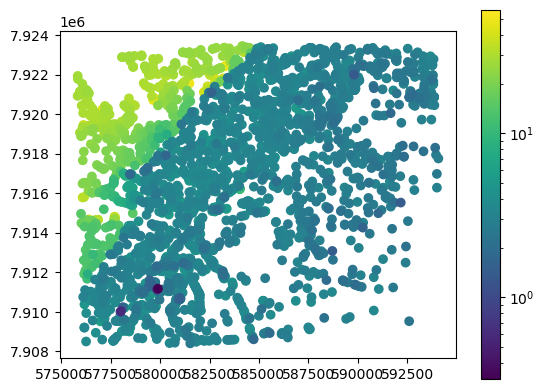

In [58]:
mapproj_match_offset.sort_values(by=col, ascending=True).to_crs(map_crs).plot(column=col, norm=matplotlib.colors.LogNorm(), legend=True)
mapproj_match_offset.sort_values(by=col, ascending=False).to_crs(map_crs).plot(column=col, norm=matplotlib.colors.LogNorm(), legend=True)

0.31547049 31.60263476


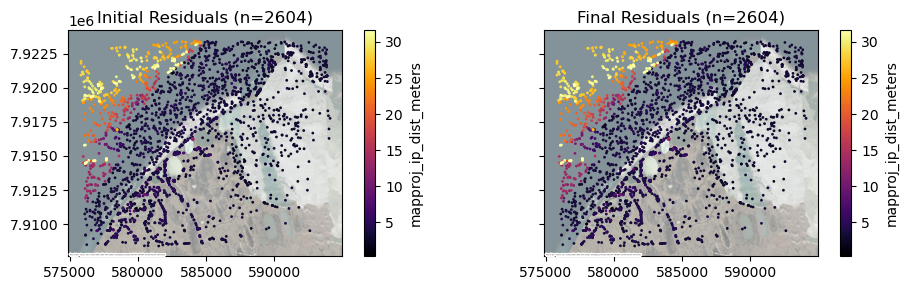

In [59]:
resid_plot(mapproj_match_offset, mapproj_match_offset, col='mapproj_ip_dist_meters', lognorm=False)

0.31547049 31.60263476


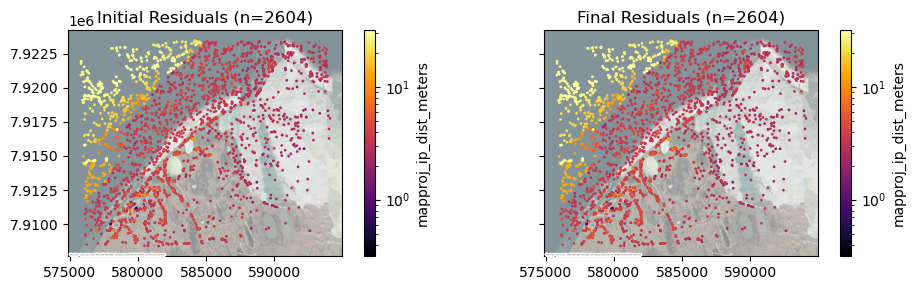

In [60]:
resid_plot(mapproj_match_offset, mapproj_match_offset, col='mapproj_ip_dist_meters', lognorm=True)

## Plot camera positions (These outputs only exist for Pinhole cameras!)

In [61]:
def read_cameras(csv_fn):
    cam_cols=['input_cam_file','x','y','z','r11','r12','r13','r21','r22','r23','r31','r32','r33']
    cam_df = pd.read_csv(csv_fn, header=0, names=cam_cols, index_col='input_cam_file')
    global_id = cam_df.index.to_series().str.split('BSG', expand=True)[1].str.split('-', expand=True)[1].astype('int') - 100
    cam_df['global_id'] = global_id
    cam_gdf = gpd.GeoDataFrame(cam_df, geometry=gpd.points_from_xy(cam_df['x'], cam_df['y'], cam_df['z'], crs='EPSG:4978'))
    return cam_gdf

In [62]:
cam_init_csv = ba_prefix+'-initial-cameras.csv'
cam_final_csv = ba_prefix+'-final-cameras.csv'

In [63]:
#This compares the initial bundle_adjust output with post-pc_align bundle_adjust output
if two_stage:
    cam_init_csv = ba_prefix+'-final-cameras.csv'
    cam_final_csv = ba_prefix+'_pc_align-final-cameras.csv'

In [64]:
cam_init_gdf = read_cameras(cam_init_csv)
cam_final_gdf = read_cameras(cam_final_csv)

FileNotFoundError: [Errno 2] No such file or directory: 'ba/ba_100ips_dg-initial-cameras.csv'

In [ ]:
cam_delta = cam_init_gdf[['x','y','z']] - cam_final_gdf[['x','y','z']]
#The .values here drops the indices (needed when tsai filenames are different at different stages)
if two_stage:
    cam_delta = cam_init_gdf[['x','y','z']].values - cam_final_gdf[['x','y','z']].values
cam_final_gdf['diff_m'] = np.sqrt(np.square(cam_delta).sum(axis=1))

In [ ]:
#For some reason, this doesn't yield same results as above
cam_final_gdf['diff_m_2'] = cam_final_gdf.distance(cam_init_gdf) #align=True

In [ ]:
#cam_init_idx = cam_init['input_cam_file'].str.split('/', expand=True)

### Determine relative local time and time offsets

In [ ]:
temp = cam_final_gdf.index.to_series().str.split('BSG', expand=True)[1].str.split('-', expand=True).loc[:,2:3]
cam_final_gdf['dt'] = pd.to_datetime(temp[2] + temp[3], utc=True)

In [ ]:
min_dt_str = cam_final_gdf['dt'].min().strftime('%Y-%m-%d %H:%M')

In [ ]:
cam_final_gdf['dt_local'] = cam_final_gdf['dt'].dt.tz_convert('America/Denver')

In [ ]:
cam_final_gdf['dt_diff'] = cam_final_gdf['dt'] - cam_final_gdf['dt'].min()

In [ ]:
cam_final_gdf['time'] = cam_final_gdf['dt'].dt.time

In [ ]:
cam_final_gdf['hr'] = ((cam_final_gdf['dt'] - cam_final_gdf['dt'].dt.normalize()) / pd.Timedelta('1 second')).astype(int) / 3600

In [ ]:
cam_final_gdf['hr_local'] = ((cam_final_gdf['dt_local'] - cam_final_gdf['dt_local'].dt.normalize()) / pd.Timedelta('1 second')).astype(int) / 3600

In [ ]:
#cam_final_gdf['time_diff'] = cam_final_gdf['time_diff'] - cam_final_gdf['time_diff'].min()

In [ ]:
cam_final_gdf['dt_diff_days'] = cam_final_gdf['dt_diff'].dt.total_seconds()/86400

In [ ]:
cam_final_gdf['mx'] = cam_final_gdf.to_crs(map_crs).geometry.x.values
cam_final_gdf['my'] = cam_final_gdf.to_crs(map_crs).geometry.y.values

In [ ]:
cam_final_gdf.describe()

In [ ]:
ax = cam_final_gdf.plot.scatter(x='mx', y='my', c='hr_local', s=36, cmap='twilight', edgecolor='k', vmin=0, vmax=24)
centroid_gdf.plot(ax=ax, marker='*', color='w', edgecolor='k')
ctx.add_basemap(ax, **ctx_kwargs)
ax.set_title('Local time of acquisition')

In [ ]:
ax = cam_final_gdf.plot.scatter(x='mx', y='my', c='dt_diff_days', s=36, cmap='inferno', edgecolor='k')
centroid_gdf.plot(ax=ax, marker='*', color='w', edgecolor='k')
ctx.add_basemap(ax, **ctx_kwargs)
ax.set_title('Time offset relative to '+min_dt_str)

In [ ]:
ax = cam_final_gdf.plot.scatter(x='mx', y='my', c='dt_diff', s=36, cmap='inferno', edgecolor='k')
centroid_gdf.plot(ax=ax, marker='*', color='w', edgecolor='k')
ctx.add_basemap(ax, **ctx_kwargs)

In [ ]:
ax = cam_final_gdf.plot.scatter(x='mx', y='my', c='dt', s=36, cmap='inferno', edgecolor='k')
centroid_gdf.plot(ax=ax, marker='*', color='w', edgecolor='k')
ctx.add_basemap(ax, **ctx_kwargs)

In [ ]:
ax = cam_final_gdf.to_crs(map_crs).plot(c=cam_final_gdf['dt'], cmap='inferno', legend='True', edgecolor='k', legend_kwds={'label': "Acquisition Datetime"})
centroid_gdf.plot(ax=ax, marker='*', color='w', edgecolor='k')
ctx.add_basemap(ax, **ctx_kwargs)

In [ ]:
ax = cam_final_gdf.to_crs(map_crs).plot(c=cam_final_gdf['dt'].dt.date, cmap='inferno', legend='True', edgecolor='k', legend_kwds={'label': "Acquisition Datetime"})
centroid_gdf.plot(ax=ax, marker='*', color='w', edgecolor='k')
ctx.add_basemap(ax, **ctx_kwargs)

## Compare with TLE

In [ ]:
tle_fn = 'test_tle_ecef_xyz.csv'
tle_cols = ['tle_x', 'tle_y', 'tle_z']

In [ ]:
cam_df = pd.read_csv(tle_fn, index_col='img')
cam_df = cam_df[cam_df.index.to_series().str.contains("pregeoreferenced")==False]

In [ ]:
cam_tle_delta = cam_final_gdf[['x','y','z']] - cam_df.values
cam_final_gdf['tle_diff_m'] = np.sqrt(np.square(cam_tle_delta).sum(axis=1))

In [ ]:
cam_gdf = gpd.GeoDataFrame(cam_df, geometry=gpd.points_from_xy(cam_df['ecef_x'], cam_df['ecef_y'], cam_df['ecef_z'], crs='EPSG:4978'))

In [ ]:
cam_gdf

In [ ]:
#Do a proper join
#cam_df.index.to_series().str.split('/', expand=True)[1].str.split('.', expand=True)[0].values

In [ ]:
cam_final_gdf['tle_diff_m']

In [ ]:
cam_tle_delta

In [ ]:
cam_final_gdf.head()

In [ ]:
plot_kw = {'markersize':10}
ax = cam_final_gdf.to_crs(map_crs).plot(color='b', label='Final', **plot_kw)
cam_gdf.to_crs(map_crs).plot(ax=ax, color='r', label='TLE', **plot_kw)
centroid_gdf.plot(ax=ax, marker='*', color='w', edgecolor='k')
ax.legend()
ctx.add_basemap(ax, **ctx_kwargs)
#ax.set_aspect('equal')

In [ ]:
ax = cam_final_gdf.plot.scatter(x='mx', y='my', c='dt_diff_days', s=36, cmap='inferno', edgecolor='k')
centroid_gdf.plot(ax=ax, marker='*', color='w', edgecolor='k')
ctx.add_basemap(ax, **ctx_kwargs)
ax.set_title('Time offset relative to '+min_dt_str)

In [ ]:
ax = cam_final_gdf.to_crs(map_crs).plot(vmin=0, vmax=20, column='global_id', cmap='tab20', legend='True', edgecolor='k', legend_kwds={'label': "BlackSky Satellite ID"})
centroid_gdf.plot(ax=ax, marker='*', color='w', edgecolor='k')
ctx.add_basemap(ax, **ctx_kwargs)

In [ ]:
plot_kw = {'markersize':10}
ax = cam_init_gdf.to_crs(map_crs).plot(color='r', label='Initial', **plot_kw)
cam_final_gdf.to_crs(map_crs).plot(ax=ax, color='b', label='Final', **plot_kw)
centroid_gdf.plot(ax=ax, marker='*', color='w', edgecolor='k')
ax.legend()
ctx.add_basemap(ax, **ctx_kwargs)
#ax.set_aspect('equal')

In [ ]:
#ax = cam_final_gdf.to_crs(map_crs).plot(column='diff_m', norm=matplotlib.colors.LogNorm(), legend='True', legend_kwds={'label': "Position Difference (m)"})
#ax = cam_final_gdf.to_crs(map_crs).plot(column='diff_m_2', norm=matplotlib.colors.LogNorm(), legend='True', legend_kwds={'label': "Position Difference (m)"})
#centroid_gdf.plot(ax=ax, marker='*', color='w', edgecolor='k')
#ctx.add_basemap(ax, **ctx_kwargs)

### Compute rotation delta

In [ ]:
from scipy.spatial.transform import Rotation as R

In [ ]:
R_init = R.from_matrix(cam_init_gdf[['r11','r12','r13','r21','r22','r23','r31','r32','r33']].values.reshape((cam_init_gdf.shape[0],3,3)))
R_final = R.from_matrix(cam_final_gdf[['r11','r12','r13','r21','r22','r23','r31','r32','r33']].values.reshape((cam_final_gdf.shape[0],3,3)))

In [ ]:
#R_init.as_euler('ZYX', degrees=True)
#R_final.as_euler('ZYX', degrees=True)

In [ ]:
eul_diff = (R_init.as_euler('ZYX', degrees=True) - R_final.as_euler('ZYX', degrees=True))

In [ ]:
cam_final_gdf['diff_deg'] = np.sqrt(np.square(eul_diff).sum(axis=1))

In [ ]:
ax = cam_final_gdf.to_crs(map_crs).plot(column='diff_deg', legend='True', legend_kwds={'label': "Orientation Difference (deg)"})
centroid_gdf.plot(ax=ax, marker='*', color='w', edgecolor='k')
ctx.add_basemap(ax, **ctx_kwargs)

In [ ]:
def cam_diff_plot(log=False):
    f, axa = plt.subplots(1,2, figsize=(10,3), sharex=True, sharey=True)
    norm=None
    if log:
        norm=matplotlib.colors.LogNorm()
    #plot_kw = {'norm':norm, 's':1, 'legend':True, 'legend_kwds':{'label': col}}
    cam_final_gdf.to_crs(map_crs).plot(ax=axa[0], norm=norm, column='diff_m', legend='True', legend_kwds={'label': "Position Difference (m)"})
    centroid_gdf.plot(ax=axa[0], marker='*', color='w', edgecolor='k')
    ctx.add_basemap(ax=axa[0], **ctx_kwargs)
    if log:
        norm=matplotlib.colors.LogNorm()
    cam_final_gdf.to_crs(map_crs).plot(ax=axa[1], norm=norm, column='diff_deg', legend='True', legend_kwds={'label': "Orientation Difference (deg)"})
    centroid_gdf.plot(ax=axa[1], marker='*', color='w', edgecolor='k')
    ctx.add_basemap(ax=axa[1], **ctx_kwargs)
    axa[0].set_title(f'Position Difference (m)')
    axa[1].set_title(f'Orientation Difference (deg)')
    plt.tight_layout()

In [ ]:
cam_diff_plot()

In [ ]:
cam_diff_plot(log=True)

## Geoplot tests for KDE

In [ ]:
#import geoplot as gplt
#import geoplot.crs as gcrs

In [ ]:
#ax = gplt.pointplot(mapproj_match_offset, projection=gcrs.AlbersEqualArea(), s=1)
#gplt.kdeplot(mapproj_match_offset[['mapproj_ip_dist_meters','geometry']], projection=gcrs.AlbersEqualArea(), ax=ax)

## Convergence angles

In [65]:
conv_txt = ba_prefix+'-convergence_angles.txt'

In [66]:
conv_cols = ['img1','img2','conv_25','conv_50','conv_75','num_angles']
conv = pd.read_csv(conv_txt, delimiter=' ', skiprows=1, header=0, names=conv_cols, index_col=False)
conv_valid = conv[conv['num_angles'] != 0]

<Axes: xlabel='index', ylabel='conv_50'>

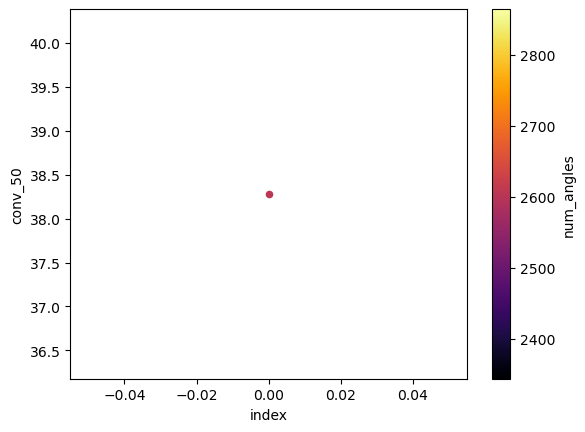

In [67]:
conv_valid.reset_index().plot.scatter(x='index', y='conv_50', c='num_angles', cmap='inferno')

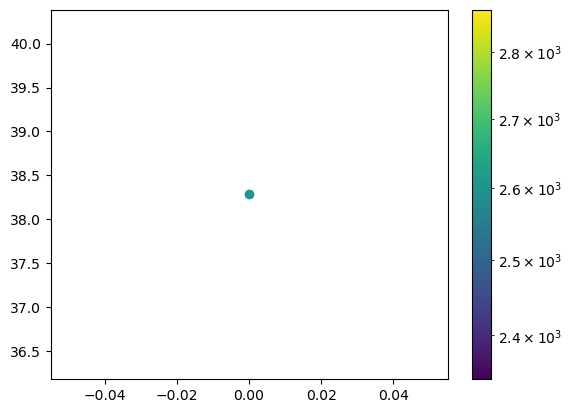

In [68]:
f, ax = plt.subplots()
m = ax.scatter(conv_valid.index, conv_valid['conv_50'], c=conv_valid['num_angles'], norm=matplotlib.colors.LogNorm())
plt.colorbar(m)

#### Testing Rotation Distance
http://www.boris-belousov.net/2016/12/01/quat-dist/ 

In [ ]:
R_final.as_matrix()[1]

In [ ]:
R_final.as_matrix()[1].T

In [ ]:
np.transpose(R_final.as_matrix(), axes=(0,2,1))[1]

In [ ]:
R_diff = R_init.as_matrix() * np.transpose(R_final.as_matrix(), axes=(0,2,1))

In [ ]:
R_diff[1]

In [ ]:
np.trace(R_diff, axis1=1, axis2=2)

In [ ]:
np.radians((np.trace(R_diff, axis1=1, axis2=2) - 1)/2)

In [ ]:
np.degrees(np.arccos(np.radians((np.trace(R_diff, axis1=1, axis2=2) - 1)/2)))